# Plotting Feature Importances

Tree-based models provide a way to tell which features have the biggest impact     

This function plots feature importances for sklearn models

## Concoct a dataset with 20 features, 6 of which are informative

    * features 0-4 are informative (in X_left)
    * one unknown feature in 5-19 is also informative (X_right)

In [9]:
from sklearn.datasets import make_classification

X_left, y = make_classification(n_samples     = 100, 
                                n_features    = 5, 
                                n_informative = 5, 
                                n_redundant   = 0, 
                                n_repeated    = 0, 
                                n_classes     = 2, 
                                random_state  = 7,
                                n_clusters_per_class=2)

X_right, _ = make_classification(n_samples     = 100, 
                                 n_features    = 15, 
                                 n_informative = 1, 
                                 n_redundant   = 5, 
                                 n_repeated    = 5, 
                                 n_classes     = 1, 
                                 random_state  = 7,
                                 n_clusters_per_class=1)

import numpy as np
X = np.hstack((X_left, X_right))

In [10]:
import warnings
warnings.simplefilter(action="ignore", category=DeprecationWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action="ignore", category=ConvergenceWarning)

# plot_feature_importances FUNCTION

In [14]:
def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    '''
    plot feature importances of a tree-based sklearn estimator
    
    Note: X_train and y_train are pandas DataFrames
    
    Note: Scikit-plot is a lovely package but I sometimes have issues
              1. flexibility/extendibility
              2. complicated models/datasets
          But for many situations Scikit-plot is the way to go
          see https://scikit-plot.readthedocs.io/en/latest/Quickstart.html
    
    Parameters
    ----------
        clf         (sklearn estimator) if not fitted, this routine will fit it
        
        X_train     (pandas DataFrame)
        
        y_train     (pandas DataFrame)  optional
                                        required only if clf has not already been fitted 
        
        top_n       (int)               Plot the top_n most-important features
                                        Default: 10
                                        
        figsize     ((int,int))         The physical size of the plot
                                        Default: (8,8)
        
        print_table (boolean)           If True, print out the table of feature importances
                                        Default: False
        
    Returns
    -------
        the pandas dataframe with the features and their importance
        
    Author
    ------
        George Fisher
    '''
    
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    #from xgboost.core     import XGBoostError
    #from lightgbm.sklearn import LightGBMError
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except ( ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

# Example

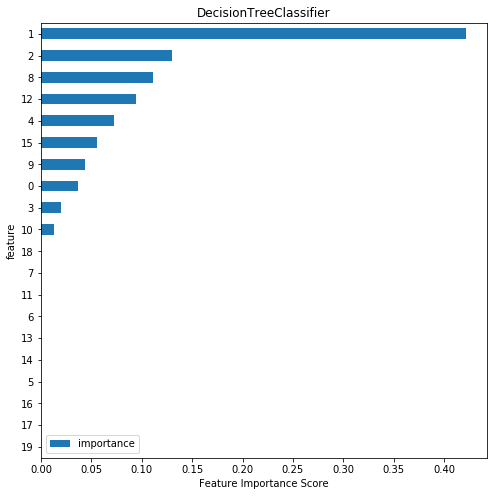

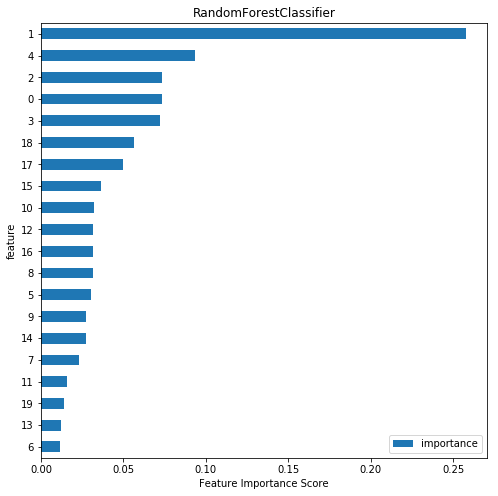

In [15]:
import pandas as pd
X_train = pd.DataFrame(X)
y_train = pd.DataFrame(y)

#from xgboost              import XGBClassifier
#from sklearn.ensemble     import ExtraTreesClassifier
#from sklearn.tree         import ExtraTreeClassifier
from sklearn.tree         import DecisionTreeClassifier
#from sklearn.ensemble     import GradientBoostingClassifier
#from sklearn.ensemble     import BaggingClassifier
#from sklearn.ensemble     import AdaBoostClassifier
from sklearn.ensemble     import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
#from lightgbm             import LGBMClassifier


clfs = [
        
       DecisionTreeClassifier(),
              RandomForestClassifier()]

for clf in clfs:
    try:
        _ = plot_feature_importances(clf, X_train, y_train, top_n=X_train.shape[1], title=clf.__class__.__name__)
    except AttributeError as e:
        print(e)

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit( X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
export_graphviz(dtree, out_file='tree.dot',  
                filled=True, rounded=True,
                special_characters=True)

In [22]:
from graphviz import Source
graph = Source(dtree.export_graphviz(estimator, out_file=None
   , feature_names=labels, class_names=['0', '1', '2'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

ImportError: No module named graphviz